In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
import seaborn as sns
%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')
from IPython.display import set_matplotlib_formats
sns.set_style("darkgrid")
set_matplotlib_formats('retina')
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)
sns.set_palette("deep")

In [2]:
data = pd.read_csv("data/train.csv")

In [3]:
data.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [4]:
data.shape

(2952, 15)

In [5]:
print('단지코드 수: ',data.groupby('단지코드').count().shape[0])

단지코드 수:  423


In [6]:
data = data.rename(columns={'도보 10분거리 내 지하철역 수(환승노선 수 반영)':'지하철역','도보 10분거리 내 버스정류장 수':'버스정류장'})

In [7]:
data.isna().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       569
임대료         569
지하철역        211
버스정류장         4
단지내주차면수       0
등록차량수         0
dtype: int64

## 임대건물구분

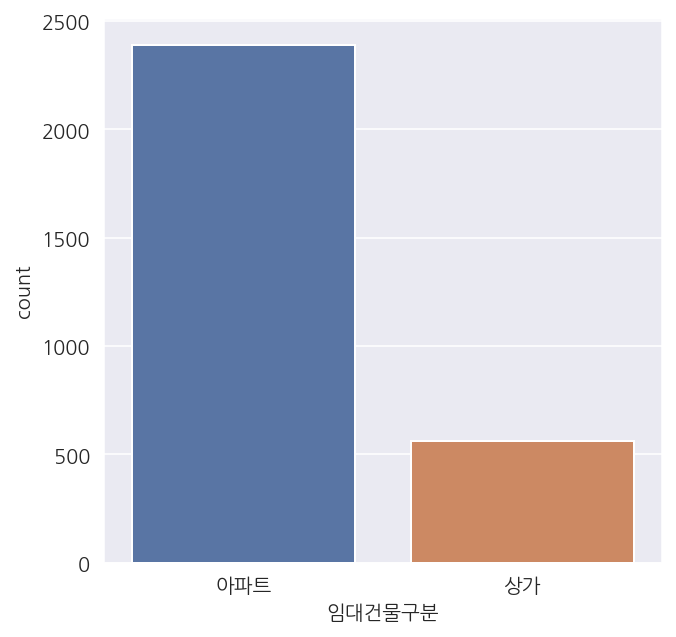

In [8]:
fig,ax = plt.subplots(figsize=(5,5))
sns.countplot(data=data,x='임대건물구분')

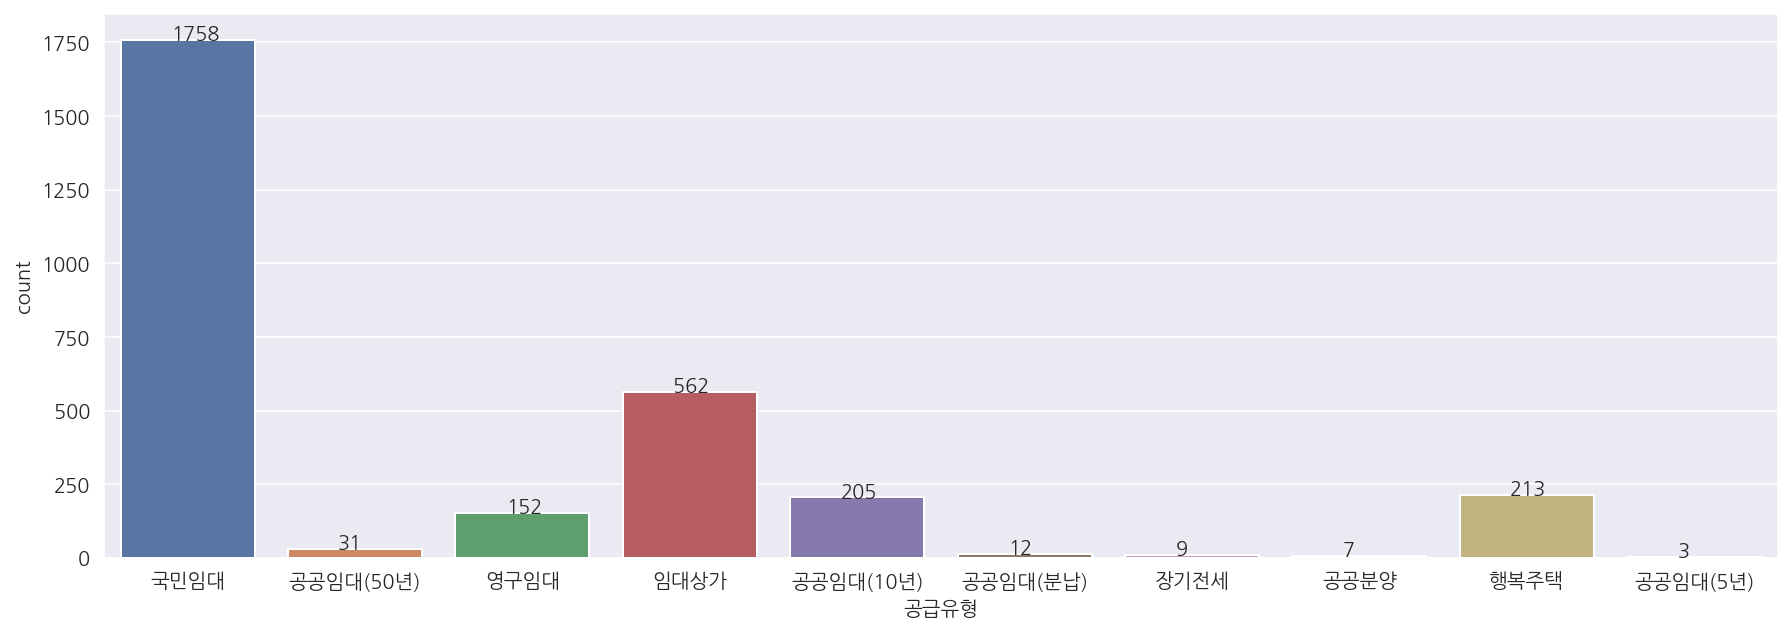

In [9]:
fig,ax = plt.subplots(figsize=(15,5))
sns.countplot(data=data,x='공급유형')
for p in ax.patches:
    ax.annotate(s=p.get_height(),xy=(p.get_xy()[0]+0.3,p.get_height()))

In [86]:
data[data['임대건물구분']=='상가']['공급유형'].unique()

array(['임대상가'], dtype=object)

## 임대료, 임대보증금

In [10]:
data['임대료'] = data['임대료'].replace('-',np.nan)
data['임대보증금'] = data['임대보증금'].replace('-',np.nan)

In [11]:
data['임대료'] = data['임대료'].apply(lambda x : float(x))
data['임대보증금'] = data['임대보증금'].apply(lambda x : float(x))

In [12]:
def get_values(code):
    df = data[(data['단지코드']==code)&(data['임대료'].isna()==False)]
    deposit = df['임대보증금'].values.mean()
    rent = df['임대료'].values.mean()
    return deposit,rent

In [13]:
code = data[data['임대료'].isna()==True]['단지코드'].unique()
for i in code:
    n = data[(data['단지코드']==i)&(data['임대료'].isna()==False)].shape[0]
    if n ==0 :
        print(i)
    if n != 0 :
        ind = data[(data['단지코드']==i)&(data['임대료'].isna()==True)].index
        data.loc[ind,'임대료'] = get_values(i)[1]

C1397
C1326


In [14]:
code = data[data['임대보증금'].isna()==True]['단지코드'].unique()
for i in code:
    n = data[(data['단지코드']==i)&(data['임대보증금'].isna()==False)].shape[0]
    if n== 0 :
        print(i)
    if n != 0 :
        ind = data[(data['단지코드']==i)&(data['임대보증금'].isna()==True)].index
        data.loc[ind,'임대보증금'] = get_values(i)[1]

C1326


- C1397

In [15]:
data[data['단지코드']=='C1397'][['지역','공급유형']].values[0]

array(['서울특별시', '장기전세'], dtype=object)

In [16]:
m = data[(data['지역']=='서울특별시')&(data['공급유형']=='장기전세')&(data['임대료'].isna()==False)]['임대료'].values.mean()

In [17]:
data.loc[data['단지코드']=='C1397','임대료'] = m

- C1326

In [18]:
data[data['단지코드']=='C1326'][['지역','공급유형']].values[0]

array(['부산광역시', '국민임대'], dtype=object)

In [19]:
m1 = data[(data['지역']=='부산광역시')&(data['공급유형']=='국민임대')&(data['임대료'].isna()==False)]['임대료'].values.mean()
m2 = data[(data['지역']=='부산광역시')&(data['공급유형']=='국민임대')&(data['임대보증금'].isna()==False)]['임대보증금'].values.mean()

In [20]:
data.loc[data['단지코드']=='C1326','임대료'] = m1
data.loc[data['단지코드']=='C1326','임대보증금'] = m2

## 지하철역

In [21]:
data[data['지하철역'].isna()==True]['지역'].unique()

array(['충청남도', '대전광역시', '경상남도'], dtype=object)

In [22]:
for i in data[data['지하철역'].isna()==True]['지역'].unique():
    print(i,data[(data['지역']==i)]['지하철역'].unique())

충청남도 [nan  0.]
대전광역시 [ 1.  0. nan]
경상남도 [ 0. nan]


In [23]:
ind = data[(data['지역']=='충청남도')&(data['지하철역'].isna()==True)].index
data.loc[ind,'지하철역'] = 0

In [24]:
ind = data[(data['지역']=='경상남도')&(data['지하철역'].isna()==True)].index
data.loc[ind,'지하철역'] = 0

In [25]:
data[data['지역']=='대전광역시'].corr()['지하철역']

총세대수        0.342788
전용면적        0.052942
전용면적별세대수   -0.135296
공가수        -0.346751
임대보증금      -0.467131
임대료        -0.175244
지하철역        1.000000
버스정류장       0.345604
단지내주차면수    -0.257796
등록차량수      -0.520857
Name: 지하철역, dtype: float64

In [26]:
X_train = data[(data['지역']=='대전광역시')&(data['지하철역'].isna()==False)]['버스정류장'].values.reshape(-1,1)
y_train = data[(data['지역']=='대전광역시')&(data['지하철역'].isna()==False)]['지하철역'].values.ravel()
X_test = data[(data['지역']=='대전광역시')&(data['지하철역'].isna()==True)]['버스정류장'].values.reshape(-1,1)

In [27]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(X_train, y_train)
pred = reg.predict(X_test)

In [28]:
ind = data[(data['지역']=='대전광역시')&(data['지하철역'].isna()==True)].index
data.loc[ind,'지하철역'] = pred

## 전용면적

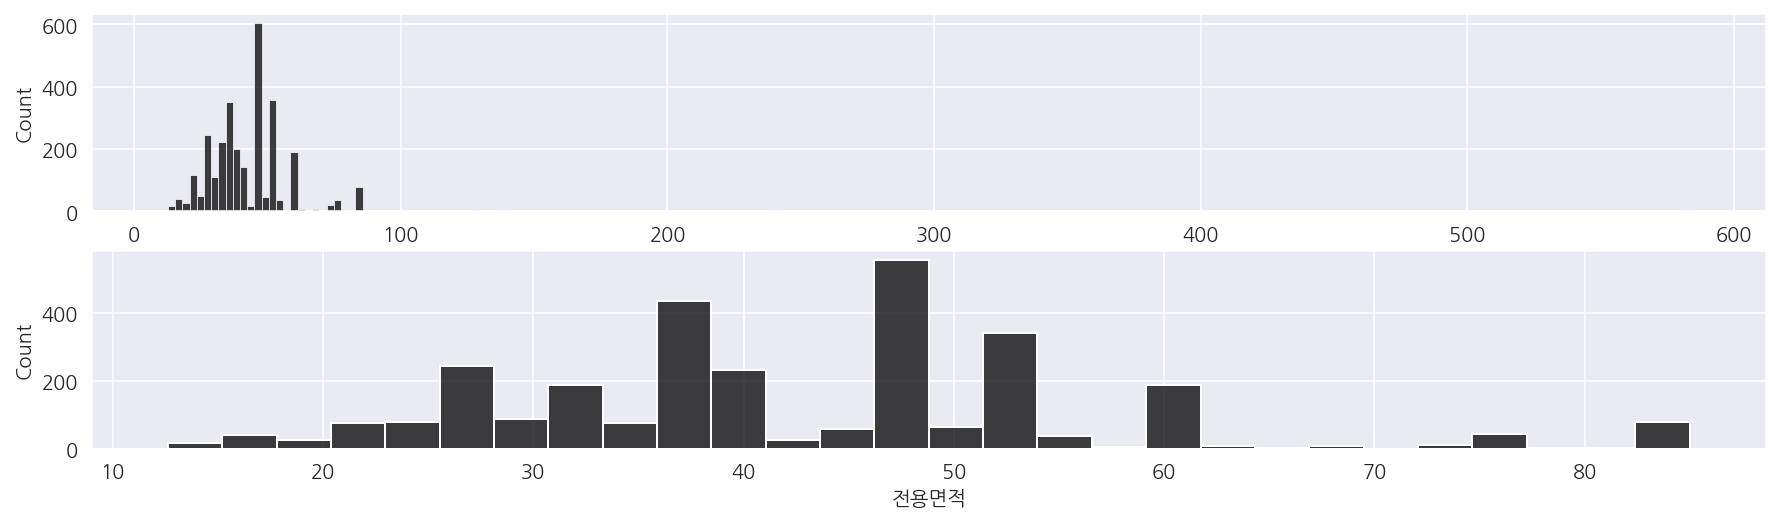

In [93]:
tmp = data[data['전용면적']<100]
fig,ax = plt.subplots(2,1,figsize=(15,4))
sns.histplot(data=data,x='전용면적',color='black',ax=ax[0])
sns.histplot(data=tmp,x='전용면적',color='black',ax=ax[1])

In [44]:
data[data['전용면적']<100].groupby('단지코드').std()['전용면적'].mean()

6.784126090920137

In [45]:
def category(x):
    for ind,i in enumerate(list(range(10,110,10))): #0부터 100까지 10단위
        if int(x) in range(i-10,i): return ind
    for ind,i in enumerate(list(range(100,600,100))):#100부터 600까지 100단위
        if int(x) in range(i,i+100): return 10+ind

In [46]:
data['전용면적 카테고리']  = data['전용면적'].apply(lambda x : category(x))

In [49]:
#for i in data['전용면적 카테고리'].unique(): data[i]=0 

In [59]:
data[data['단지코드']=='C1925']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,2,7,1,12,6,10,14,11,13,8
86,C1925,601,아파트,강원도,영구임대,26.37,298,9.0,C,8052000.0,...,0,0,0,0,0,0,0,0,0,0
87,C1925,601,아파트,강원도,영구임대,31.32,298,9.0,C,9174000.0,...,0,0,0,0,0,0,0,0,0,0
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,137655.0,...,0,0,0,0,0,0,0,0,0,0
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,137655.0,...,0,0,0,0,0,0,0,0,0,0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,137655.0,...,0,0,0,0,0,0,0,0,0,0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,137655.0,...,0,0,0,0,0,0,0,0,0,0


- 임대료, 임대보증금, 전용면적별세대수, 전용면적
- 일부 상가의 경우 임대건물구분이 다르다 

## 자격유형

In [84]:
for i in data['자격유형'].unique():
    print(i,data[data['자격유형']==i]['공급유형'].unique())

A ['국민임대' '공공임대(50년)' '공공임대(10년)' '공공임대(분납)' '장기전세' '영구임대' '공공임대(5년)']
B ['국민임대']
C ['영구임대']
D ['임대상가' '공공분양']
E ['영구임대' '국민임대']
F ['영구임대']
G ['국민임대']
H ['국민임대']
I ['영구임대']
J ['행복주택']
K ['행복주택']
L ['행복주택']
M ['행복주택']
N ['행복주택']
O ['행복주택']


- 14개 그룹

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


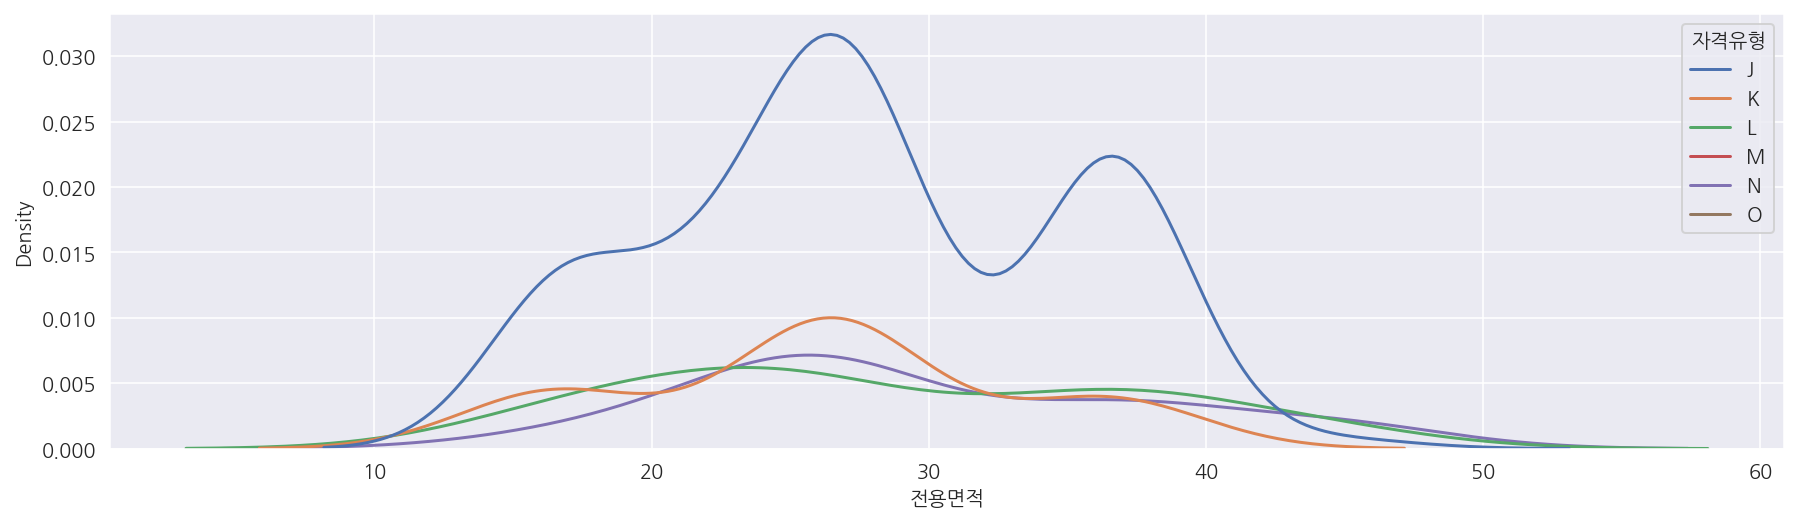

In [90]:
tmp = data[data['공급유형']=='행복주택']
fig,ax = plt.subplots(figsize=(15,4))
sns.kdeplot(data=tmp,x='전용면적',color='black',hue='자격유형')

- J / K L M N O

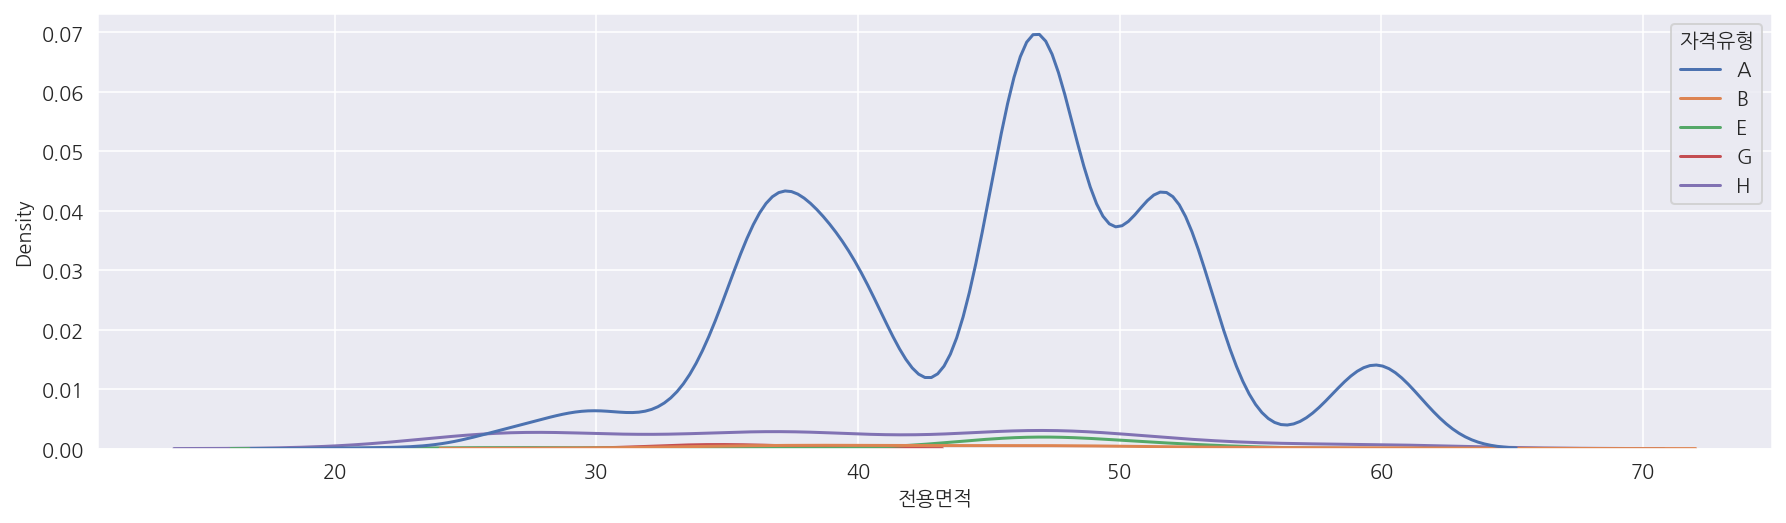

In [91]:
tmp = data[data['공급유형']=='국민임대']
fig,ax = plt.subplots(figsize=(15,4))
sns.kdeplot(data=tmp,x='전용면적',color='black',hue='자격유형')

- A / B E G H

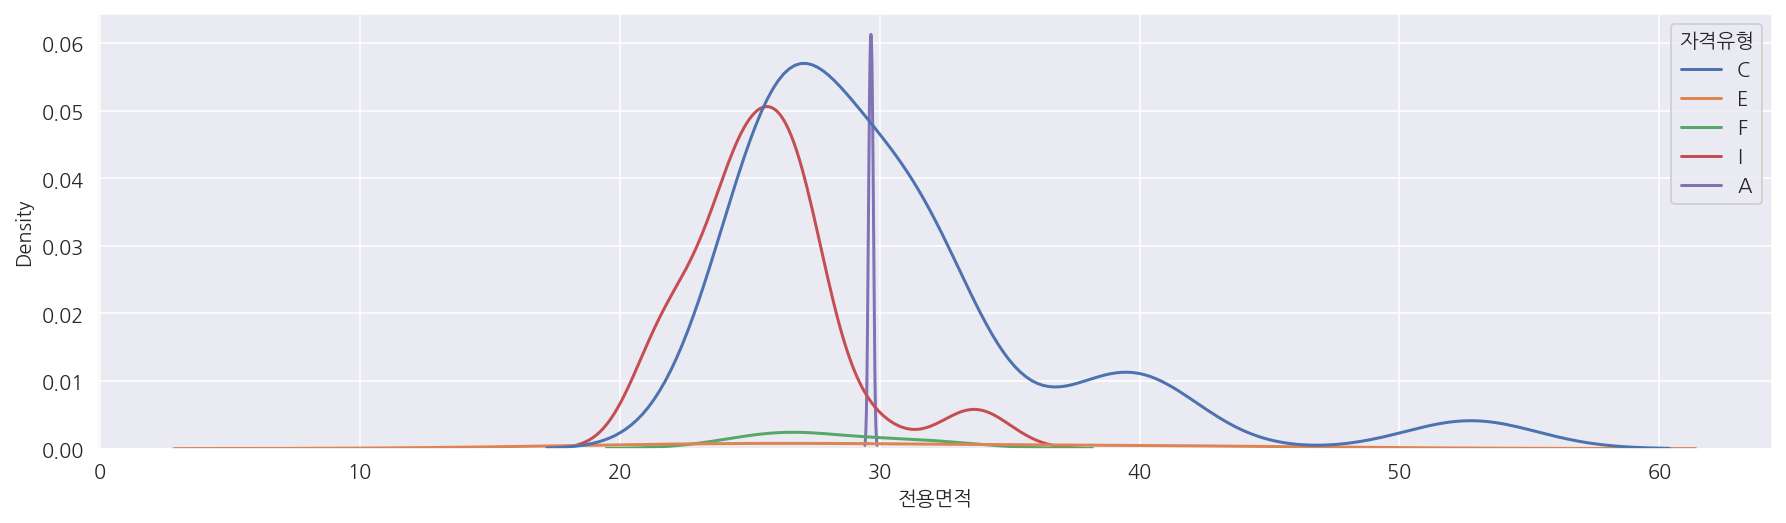

In [92]:
tmp = data[data['공급유형']=='영구임대']
fig,ax = plt.subplots(figsize=(15,4))
sns.kdeplot(data=tmp,x='전용면적',color='black',hue='자격유형')

- C / I / A / E F